<a href="https://colab.research.google.com/github/niharika901/BigData/blob/main/PMF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-surprise


     |████████████████████████████████| 11.8MB 4.3MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670909 sha256=8dbb6d76d6b1e4e2a19447c9c54487879dd6f4dd18ff96c4667e34a2b97c4d12
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [6]:
from surprise import SVD
from surprise import NMF
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
import pandas as pd
import matplotlib 

In [12]:
df = pd.read_csv("/content/u_data.csv")
df.head()

,user_id,item id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [13]:
df.drop('timestamp',axis=1,inplace=True)

In [14]:
df.isna().sum()

user_id    0
item id    0
rating     0
dtype: int64

In [18]:
n_movies=df['item id'].nunique()
n_user=df['user_id'].nunique()
print(n_movies,n_user)

1682 943


In [20]:
available_rating = df['rating'].count()
total_ratings = n_movies*n_user
missing_rating = total_ratings-available_rating
sparcity = missing_rating*100/total_ratings
print(sparcity)

93.69533063577546


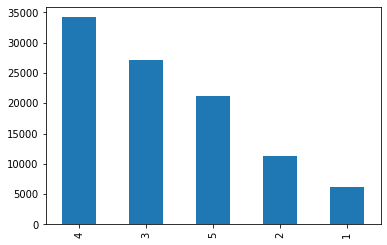

In [22]:
df['rating'].value_counts().plot(kind='bar')

In [24]:
filter_movies = df['item id'].value_counts()>3
filter_movies = filter_movies[filter_movies].index.tolist()

In [25]:
filter_users = df['user_id'].value_counts()>3
filter_users = filter_users[filter_users].index.tolist()

In [26]:
print(df.shape)
df = df[(df['item id'].isin(filter_movies)) & (df['user_id'].isin(filter_users))]
print(df.shape)

(100000, 3)
(99543, 3)


In [27]:
cols = ['item id','user_id','rating']


In [29]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(df[cols],reader)
trainset = data.build_full_trainset()
antiset = trainset.build_anti_testset()

In [30]:
algo = SVD(n_epochs=25, verbose=True)

In [32]:
cross_validate(algo,data,measures=['RMSE','MAE'],cv=5,verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 0
P

{'fit_time': (5.776592493057251,
  5.721872329711914,
  5.7679314613342285,
  5.7714762687683105,
  5.76052451133728),
 'test_mae': array([0.73976008, 0.72989806, 0.74446795, 0.73207035, 0.73872082]),
 'test_rmse': array([0.9395928 , 0.92927449, 0.94258475, 0.9333395 , 0.93645254]),
 'test_time': (0.14444756507873535,
  0.29041266441345215,
  0.15786170959472656,
  0.263718843460083,
  0.15592336654663086)}

In [33]:
predictions = algo.test(antiset)

In [34]:
predictions[0]

Prediction(uid=242, iid=186, r_ui=3.5345127231447715, est=3.7869622499121824, details={'was_impossible': False})

In [ ]:
from collections import defaultdict
